# Logistic Regression
# Solving Titanic

In [1]:
# Import necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
#Read the CSV File
df1=pd.read_csv("titanic_train.csv")
df2=pd.read_csv("titanic_test.csv")

In [3]:
df1.shape

(891, 12)

In [4]:
df2.shape

(418, 11)

In [5]:
df1.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
df1.columns[1]

'Survived'

In [7]:
df1.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [8]:
df2["Survived"]=np.nan

In [9]:
df2.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,NaN
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,NaN
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,NaN
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,NaN
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C,NaN


### Merge two Dataframe
- Cleaning process done in a single go
- Replacing null values with the combined dataset is better

In [10]:
titanic=pd.concat([df1,df2],axis=0,sort=False)
titanic.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [11]:
titanic.tail(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,NaN,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


## Exploratory Data Analysis
>Exploratory data analysis (EDA) is an approach to analyzing data sets to summarize their main characteristics, often with visual methods. 

>A statistical model can be used or not, but primarily EDA is for seeing what the data can tell us beyond the formal modeling or hypothesis testing task.

> By Wikipedia.org

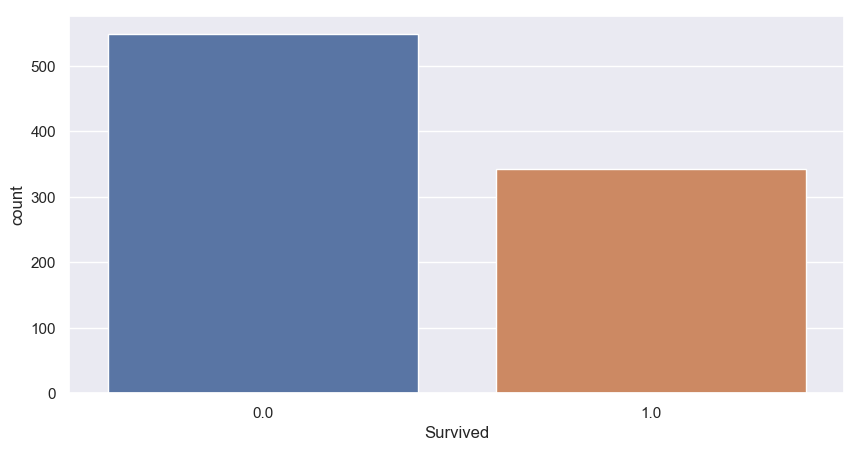

In [12]:
plt.figure(dpi=100,figsize=(10,5))
sns.countplot(x="Survived",data=titanic)
plt.show()

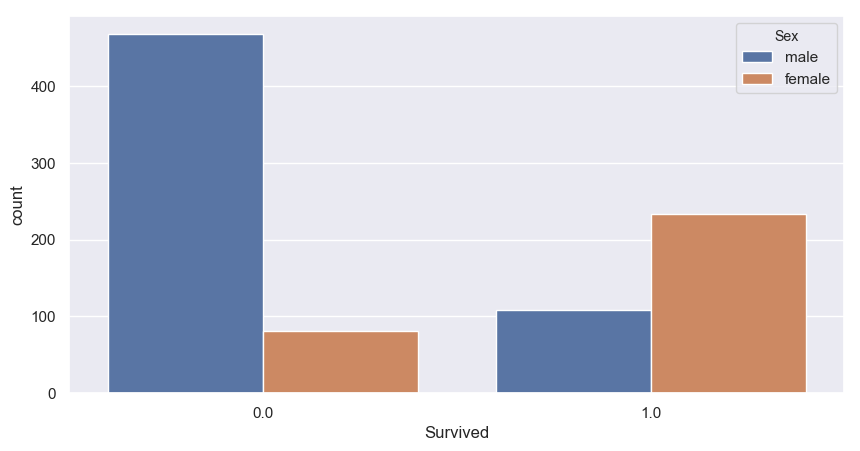

In [13]:
plt.figure(dpi=100,figsize=(10,5))
sns.countplot(x="Survived",data=titanic,hue="Sex")
plt.show()

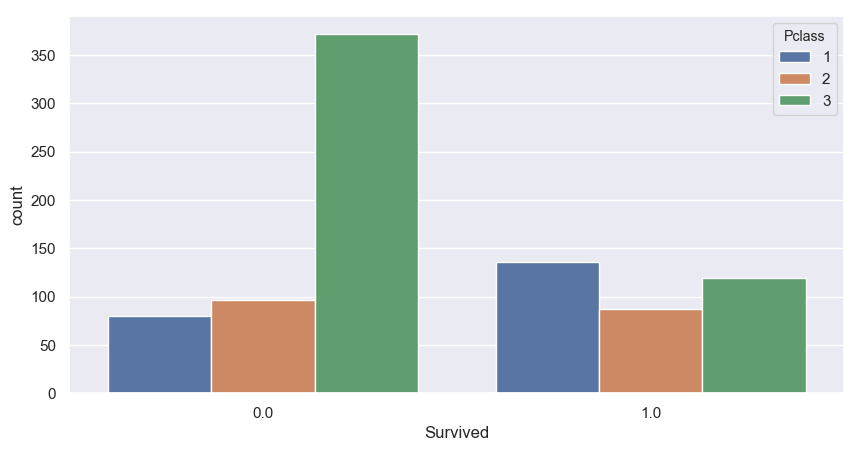

In [14]:
plt.figure(dpi=100,figsize=(10,5))
sns.countplot(x="Survived",data=titanic,hue="Pclass")
plt.show()

D:\bharath\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


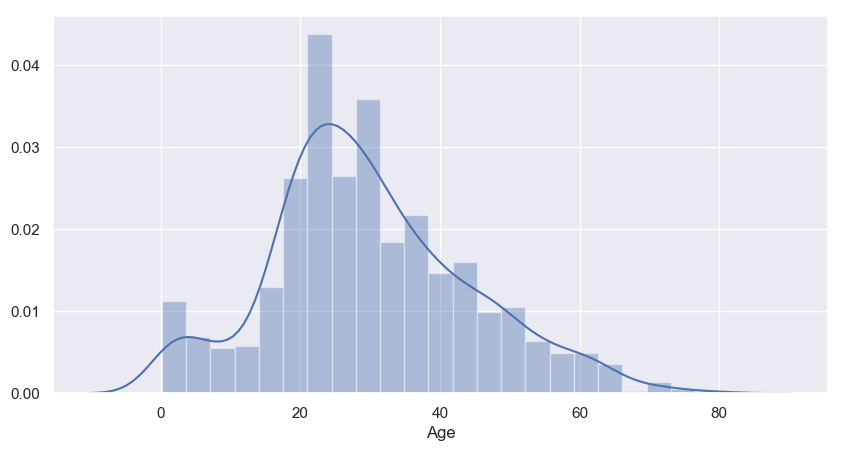

In [15]:
plt.figure(dpi=100,figsize=(10,5))
sns.distplot(titanic["Age"].dropna())
plt.show()

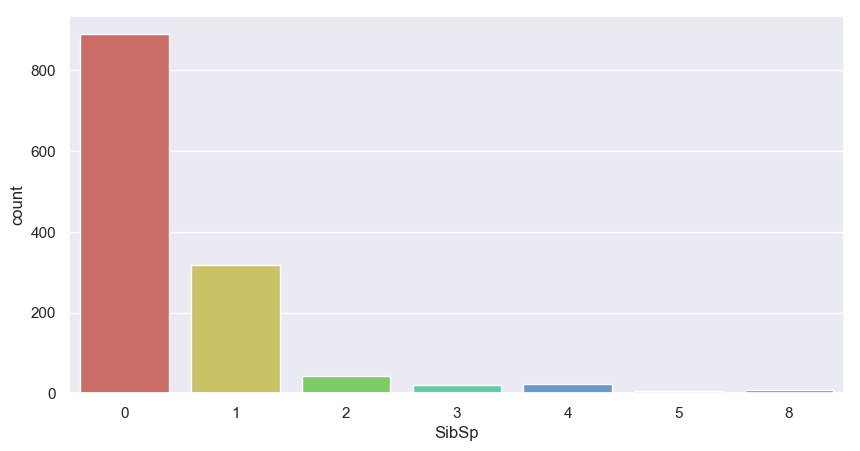

In [16]:
plt.figure(dpi=100,figsize=(10,5))
sns.countplot(x="SibSp",data=titanic,palette="hls")
plt.show()

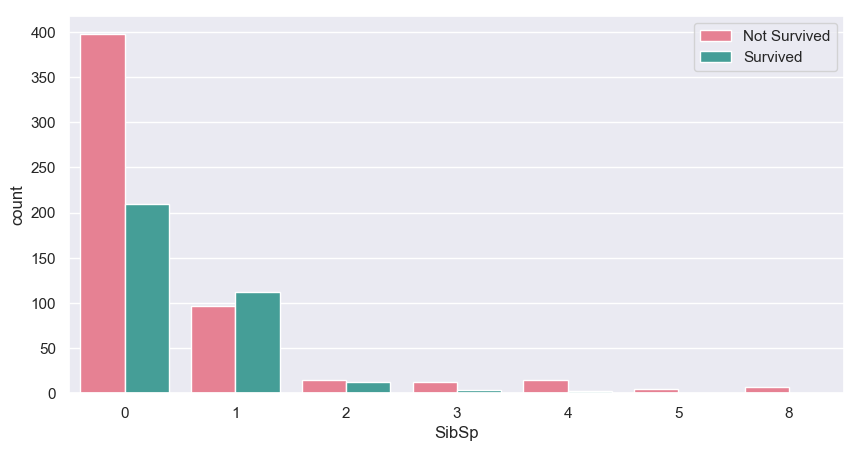

In [17]:
plt.figure(dpi=100,figsize=(10,5))
sns.countplot(x="SibSp",data=titanic,hue="Survived",palette="husl")
plt.legend(labels=["Not Survived","Survived"],loc="upper right")
plt.show()

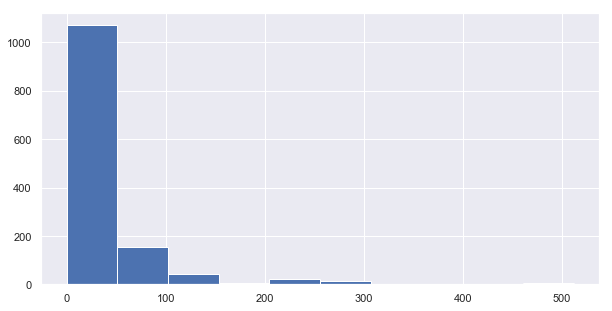

In [18]:
titanic["Fare"].hist(figsize=(10,5));

In [19]:
titanic.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.038354,0.028814,-0.055224,0.008942,0.031428
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.038354,-0.338481,1.000000,-0.408106,0.060832,0.018322,-0.558629
Age,0.028814,-0.077221,-0.408106,1.000000,-0.243699,-0.150917,0.178740
SibSp,-0.055224,-0.035322,0.060832,-0.243699,1.000000,0.373587,0.160238
Parch,0.008942,0.081629,0.018322,-0.150917,0.373587,1.000000,0.221539
Fare,0.031428,0.257307,-0.558629,0.178740,0.160238,0.221539,1.000000


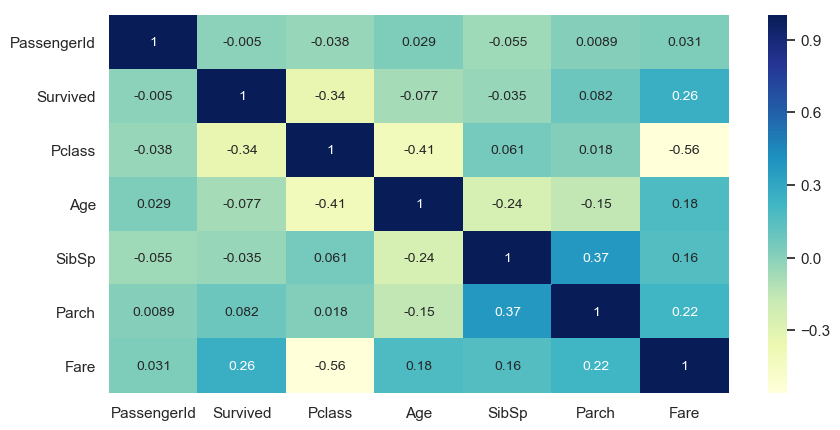

In [20]:
plt.figure(dpi=100,figsize=(10,5))
sns.heatmap(titanic.corr(),annot=True,cmap="YlGnBu")
plt.show()

## Cleaning the Data

In [21]:
titanic.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

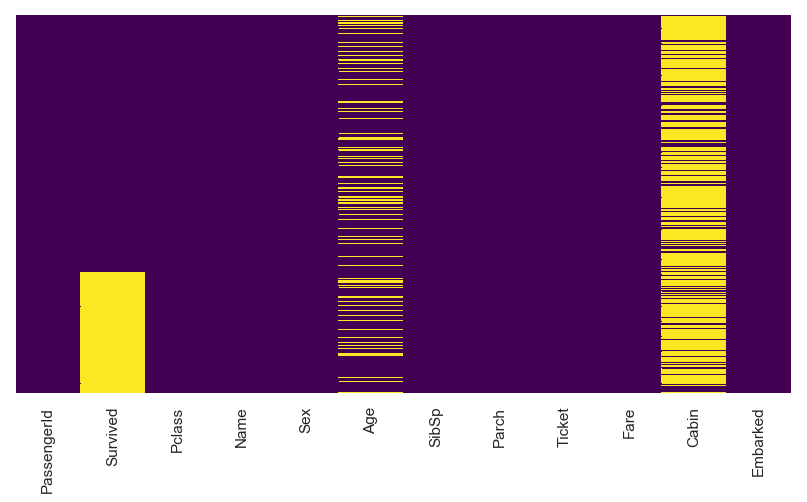

In [22]:
plt.figure(dpi=100,figsize=(10,5))
sns.heatmap(titanic.isnull(),yticklabels=False,cbar=False,cmap="viridis")
plt.show()

In [23]:
titanic.Embarked.mode()[0]

'S'

In [24]:
titanic.Embarked=titanic.Embarked.fillna(titanic.Embarked.mode()[0])
print(np.sum(titanic["Embarked"].isnull()))

0


In [25]:
titanic.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          0
dtype: int64

In [26]:
titanic.Fare.median()

14.4542

In [27]:
titanic.Fare=titanic.Fare.fillna(titanic.Fare.median())

In [28]:
titanic.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          0
dtype: int64

In [29]:
titanic.drop("Cabin",axis=1,inplace=True)

In [30]:
titanic.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,S
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,S
417,1309,NaN,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,C


In [31]:
titanic.isnull().sum()

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age            263
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

### Filling null values in Age column

D:\bharath\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


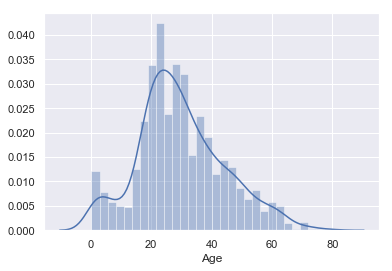

In [32]:
sns.distplot(titanic.Age.dropna(),bins=30)

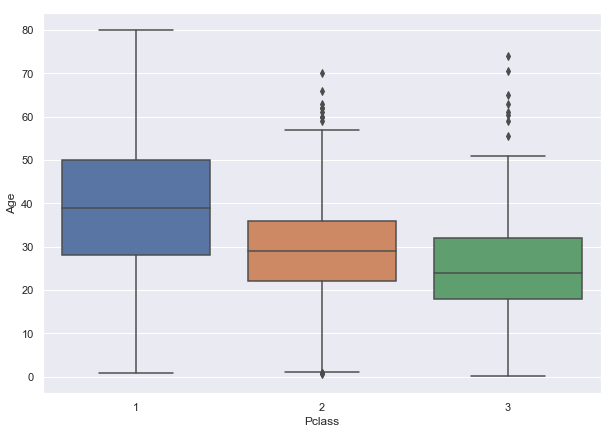

In [33]:
plt.figure(figsize=(10,7))
sns.boxplot(x="Pclass",y="Age",data=titanic)
plt.show()

In [34]:
titanic.groupby('Pclass').median()["Age"]

Pclass
1    39.0
2    29.0
3    24.0
Name: Age, dtype: float64

In [35]:
titanic.groupby('Pclass').median()["Age"][1]

39.0

In [36]:
Pclass1age=titanic.groupby('Pclass').median()["Age"][1]
Pclass2age=titanic.groupby('Pclass').median()["Age"][2]
Pclass3age=titanic.groupby('Pclass').median()["Age"][3]
print(Pclass1age,Pclass2age,Pclass3age)

39.0 29.0 24.0


In [37]:
titanic.loc[titanic.Pclass==1,"Age"]=titanic.loc[titanic.Pclass==1,"Age"].fillna(Pclass1age)
titanic.loc[titanic.Pclass==2,"Age"]=titanic.loc[titanic.Pclass==2,"Age"].fillna(Pclass2age)
titanic.loc[titanic.Pclass==3,"Age"]=titanic.loc[titanic.Pclass==3,"Age"].fillna(Pclass3age)

In [38]:
titanic.isnull().sum()

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

## Data Preprocessing for ML

In [39]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    1309 non-null int64
Survived       891 non-null float64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1309 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1309 non-null float64
Embarked       1309 non-null object
dtypes: float64(3), int64(4), object(4)
memory usage: 162.7+ KB


In [40]:
titanic.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
413,1305,NaN,3,"Spector, Mr. Woolf",male,24.0,0,0,A.5. 3236,8.0500,S
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S
416,1308,NaN,3,"Ware, Mr. Frederick",male,24.0,0,0,359309,8.0500,S
417,1309,NaN,3,"Peter, Master. Michael J",male,24.0,1,1,2668,22.3583,C


In [41]:
pd.get_dummies(titanic.Sex).head(10)

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
5,0,1
6,0,1
7,0,1
8,1,0
9,1,0


In [42]:
sex=pd.get_dummies(titanic.Sex,drop_first=True)
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [43]:
emb=pd.get_dummies(titanic.Embarked,drop_first=True)
emb.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [44]:
titanic=pd.concat([titanic,sex,emb],axis=1)
titanic.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0


In [45]:
titanic.drop(["PassengerId","Pclass","Name","Sex","Ticket","Embarked"],axis=1,inplace=True)

In [46]:
titanic.tail(3)

,Survived,Age,SibSp,Parch,Fare,male,Q,S
415,NaN,38.5,0,0,7.2500,1,0,1
416,NaN,24.0,0,0,8.0500,1,0,1
417,NaN,24.0,1,1,22.3583,1,0,0


## Splitting the Combined data into known and unknown DataFrame

In [47]:
titanicTrain=titanic.loc[titanic.Survived.notnull(),]
titanicTrain.head()

,Survived,Age,SibSp,Parch,Fare,male,Q,S
0,0.0,22.0,1,0,7.2500,1,0,1
1,1.0,38.0,1,0,71.2833,0,0,0
2,1.0,26.0,0,0,7.9250,0,0,1
3,1.0,35.0,1,0,53.1000,0,0,1
4,0.0,35.0,0,0,8.0500,1,0,1


In [48]:
titanicUnknown=titanic.loc[titanic.Survived.isnull(),]
titanicUnknown.head()

,Survived,Age,SibSp,Parch,Fare,male,Q,S
0,NaN,34.5,0,0,7.8292,1,1,0
1,NaN,47.0,1,0,7.0000,0,0,1
2,NaN,62.0,0,0,9.6875,1,1,0
3,NaN,27.0,0,0,8.6625,1,0,1
4,NaN,22.0,1,1,12.2875,0,0,1


In [49]:
titanicUnknown=titanicUnknown.drop(["Survived"],axis=1)
titanicUnknown.head()

,Age,SibSp,Parch,Fare,male,Q,S
0,34.5,0,0,7.8292,1,1,0
1,47.0,1,0,7.0000,0,0,1
2,62.0,0,0,9.6875,1,1,0
3,27.0,0,0,8.6625,1,0,1
4,22.0,1,1,12.2875,0,0,1


In [50]:
titanicTrain.head()

,Survived,Age,SibSp,Parch,Fare,male,Q,S
0,0.0,22.0,1,0,7.2500,1,0,1
1,1.0,38.0,1,0,71.2833,0,0,0
2,1.0,26.0,0,0,7.9250,0,0,1
3,1.0,35.0,1,0,53.1000,0,0,1
4,0.0,35.0,0,0,8.0500,1,0,1


## Extracting Feature Matrix X and Target Vector y

In [51]:
# Machine learning
X=titanicTrain.drop(["Survived"],axis=1)
y=titanicTrain.Survived

In [52]:
X.head(3)

,Age,SibSp,Parch,Fare,male,Q,S
0,22.0,1,0,7.2500,1,0,1
1,38.0,1,0,71.2833,0,0,0
2,26.0,0,0,7.9250,0,0,1


In [53]:
y=y.astype("int")
y.head(3)

0    0
1    1
2    1
Name: Survived, dtype: int32

## Train and Test Data for Model Validation

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=123)

In [56]:
print("X_train",X_train.shape)
print("X_test",X_test.shape)
print("y_train",y_train.shape)
print("y_test",y_test.shape)

X_train (623, 7)
X_test (268, 7)
y_train (623,)
y_test (268,)


## Applying Machine Learning -> Logistic Regression

In [57]:
from sklearn.linear_model import LogisticRegression

In [58]:
bhamodel=LogisticRegression()

In [59]:
bhamodel.fit(X_train,y_train)

D:\bharath\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [60]:
bhamodel

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [61]:
y_test_predicted=bhamodel.predict(X_test)
y_test_predicted

array([1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1])

## Accuracy of the Model

In [62]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_test_predicted)

array([[147,  23],
       [ 33,  65]], dtype=int64)

In [63]:
bhamodel.score(X_test,y_test)

0.7910447761194029

# Predicting the unknown data (test.csv)

In [64]:
output=bhamodel.predict(titanicUnknown)

In [65]:
final=pd.DataFrame({"PassengerId":df2.PassengerId,"Survived":output})

In [66]:
final.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


### Storing the pandas DataFrame as a CSV file
final.to_csv("bharathTitanicPython.csv",index=None,header=True)

# Questions??